In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from scipy.stats import probplot, boxcox

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_excel("/content/sample_data/ENB2012_data.xlsx")
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


# **Mô tả thông tin và trực quan hóa dữ liệu**

In [ ]:
#relative compactness =
#surface area = diện tích bề mặt
#wall area = diện tích tường
#roof area = khu vự mái nhà
#overall height = chiều cao tổng thể
#orientation = hướng
#glazzing area = khu vực kính
#heating load

In [ ]:
df.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation',
                'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [ ]:
#Check unique values for all columns in a DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'relative_compactness' has 12 unique values:
[0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]


Column 'surface_area' has 12 unique values:
[514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]


Column 'wall_area' has 7 unique values:
[294.  318.5 343.  416.5 245.  269.5 367.5]


Column 'roof_area' has 4 unique values:
[110.25 122.5  147.   220.5 ]


Column 'overall_height' has 2 unique values:
[7.  3.5]


Column 'orientation' has 4 unique values:
[2 3 4 5]


Column 'glazing_area' has 4 unique values:
[0.   0.1  0.25 0.4 ]


Column 'glazing_area_distribution' has 6 unique values:
[0 1 2 3 4 5]


Column 'heating_load' has 587 unique values:
[15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.

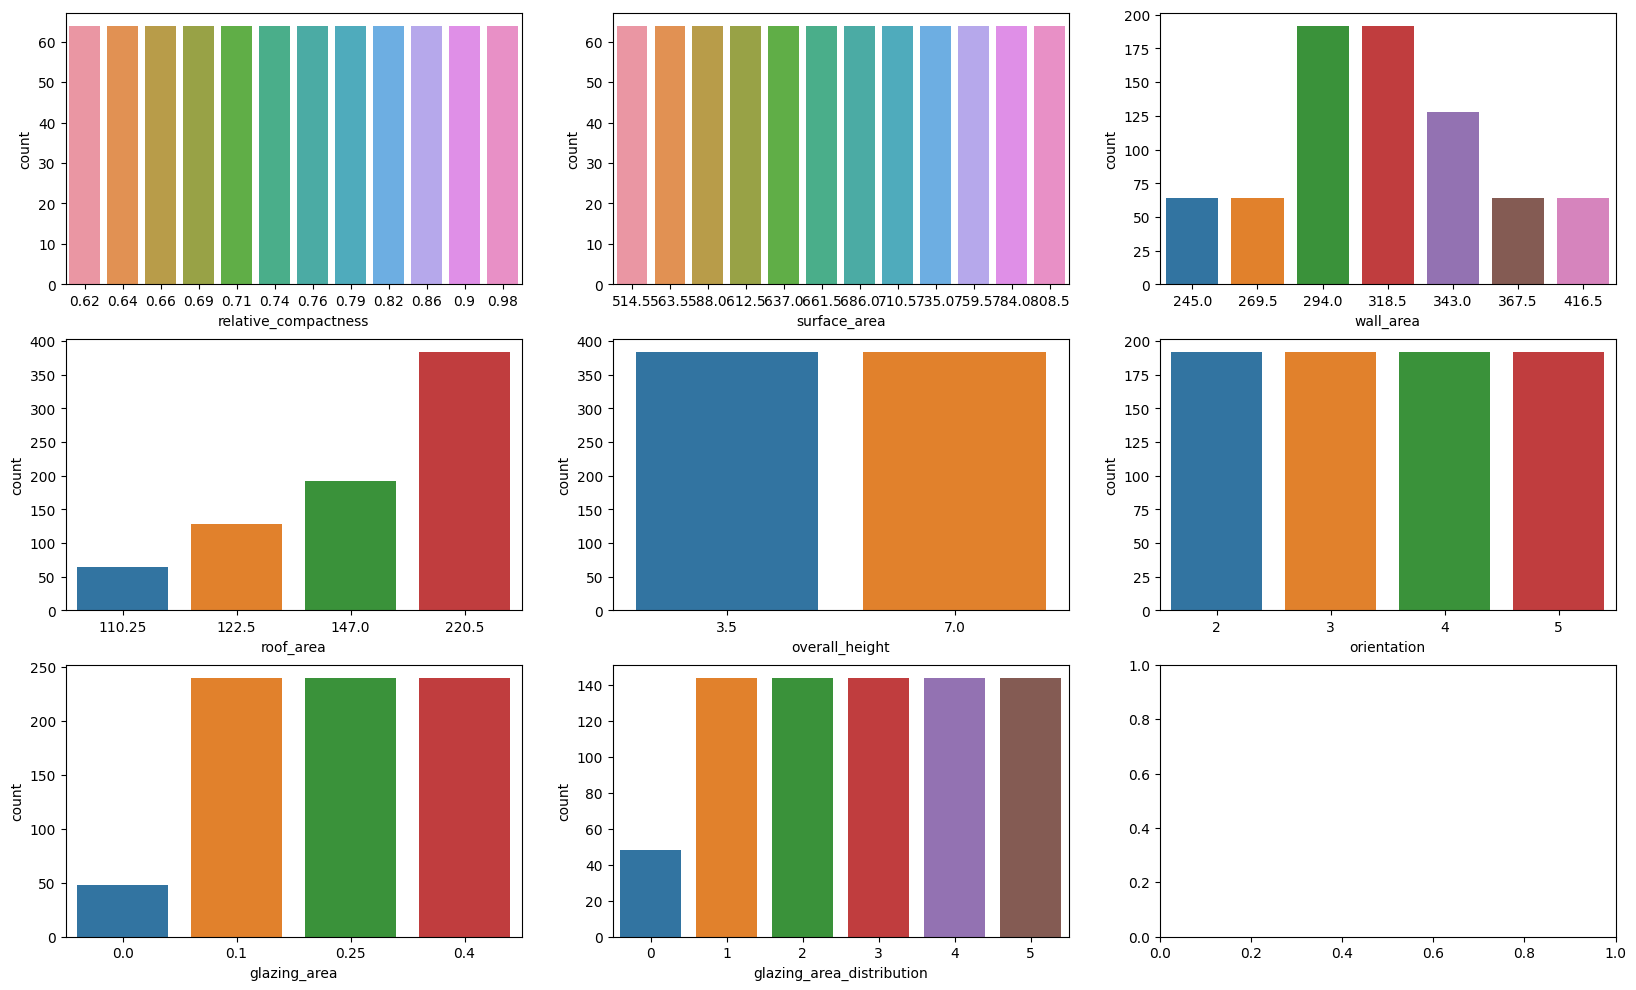

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(20,12))
sns.countplot(ax=axes[0,0], data=df, x=df['relative_compactness'])
sns.countplot(ax=axes[0,1], data=df, x=df['surface_area'])
sns.countplot(ax=axes[0,2], data=df, x=df['wall_area'])
sns.countplot(ax=axes[1,0], data=df, x=df['roof_area'])
sns.countplot(ax=axes[1,1], data=df, x=df['overall_height'])
sns.countplot(ax=axes[1,2], data=df, x=df['orientation'])
sns.countplot(ax=axes[2,0], data=df, x=df['glazing_area'])
sns.countplot(ax=axes[2,1], data=df, x=df['glazing_area_distribution'])
plt.show()

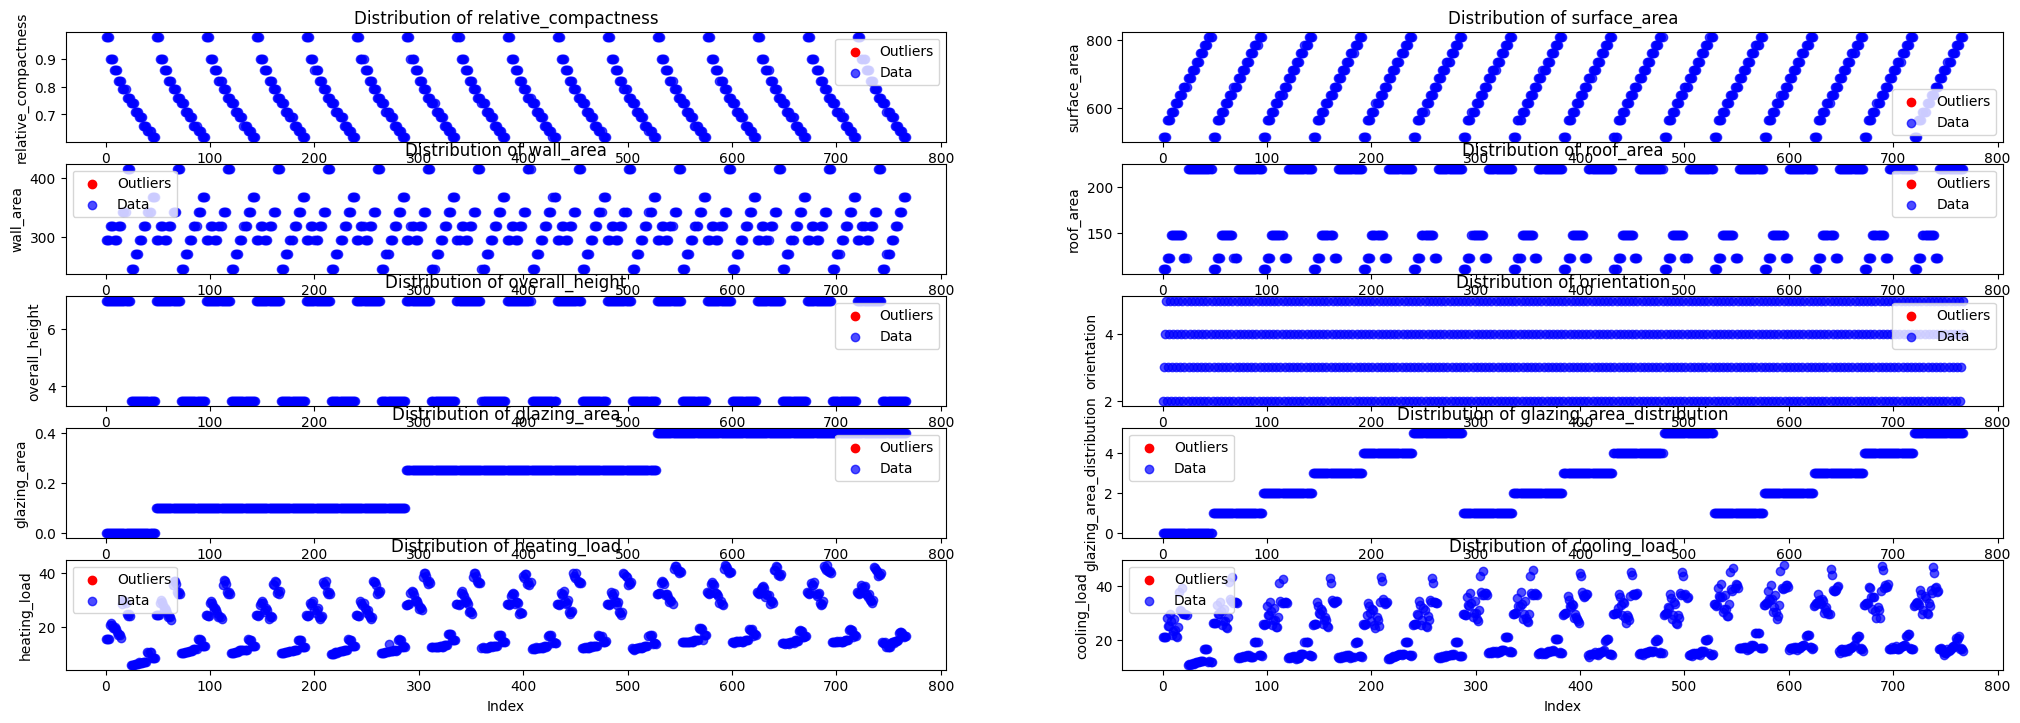

In [ ]:
threshold = 1.5
plt.figure(figsize=(25, 10))
num_rows_num = len(df.select_dtypes(include='number').columns)//2+1

for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(num_rows_num,2, i + 1)

    # Calculate the IQR for the attribute
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Detect and plot outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')

    # Plot the attribute
    plt.scatter(df.index, df[col], color='blue', alpha=0.7, label='Data')

    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Distribution of {col}')
    plt.legend()

# **Xử lý dữ liệu**

In [ ]:
#như đã biết từ thông tin mô tả, orientation
#và glazing_are_distribution nên là categorical
# do đó, chuyển data type sang category
df_new = df.copy()
df_new['orientation'] = df_new['orientation'].astype('category')
df_new['glazing_area_distribution'] = df_new['glazing_area_distribution'].astype('category')

<ipython-input-41-13d2ca282191>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr().round(2)


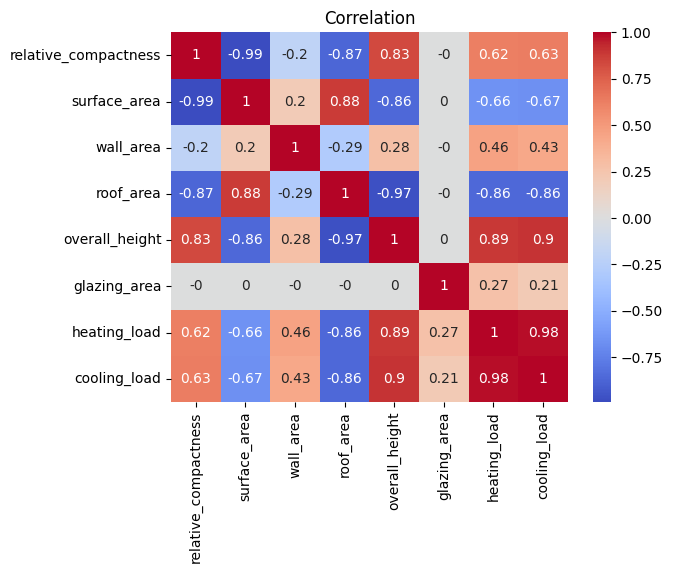

In [ ]:
# kiểm tra correlation giữa các thuộc tính
corr = df_new.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation')
plt.show()

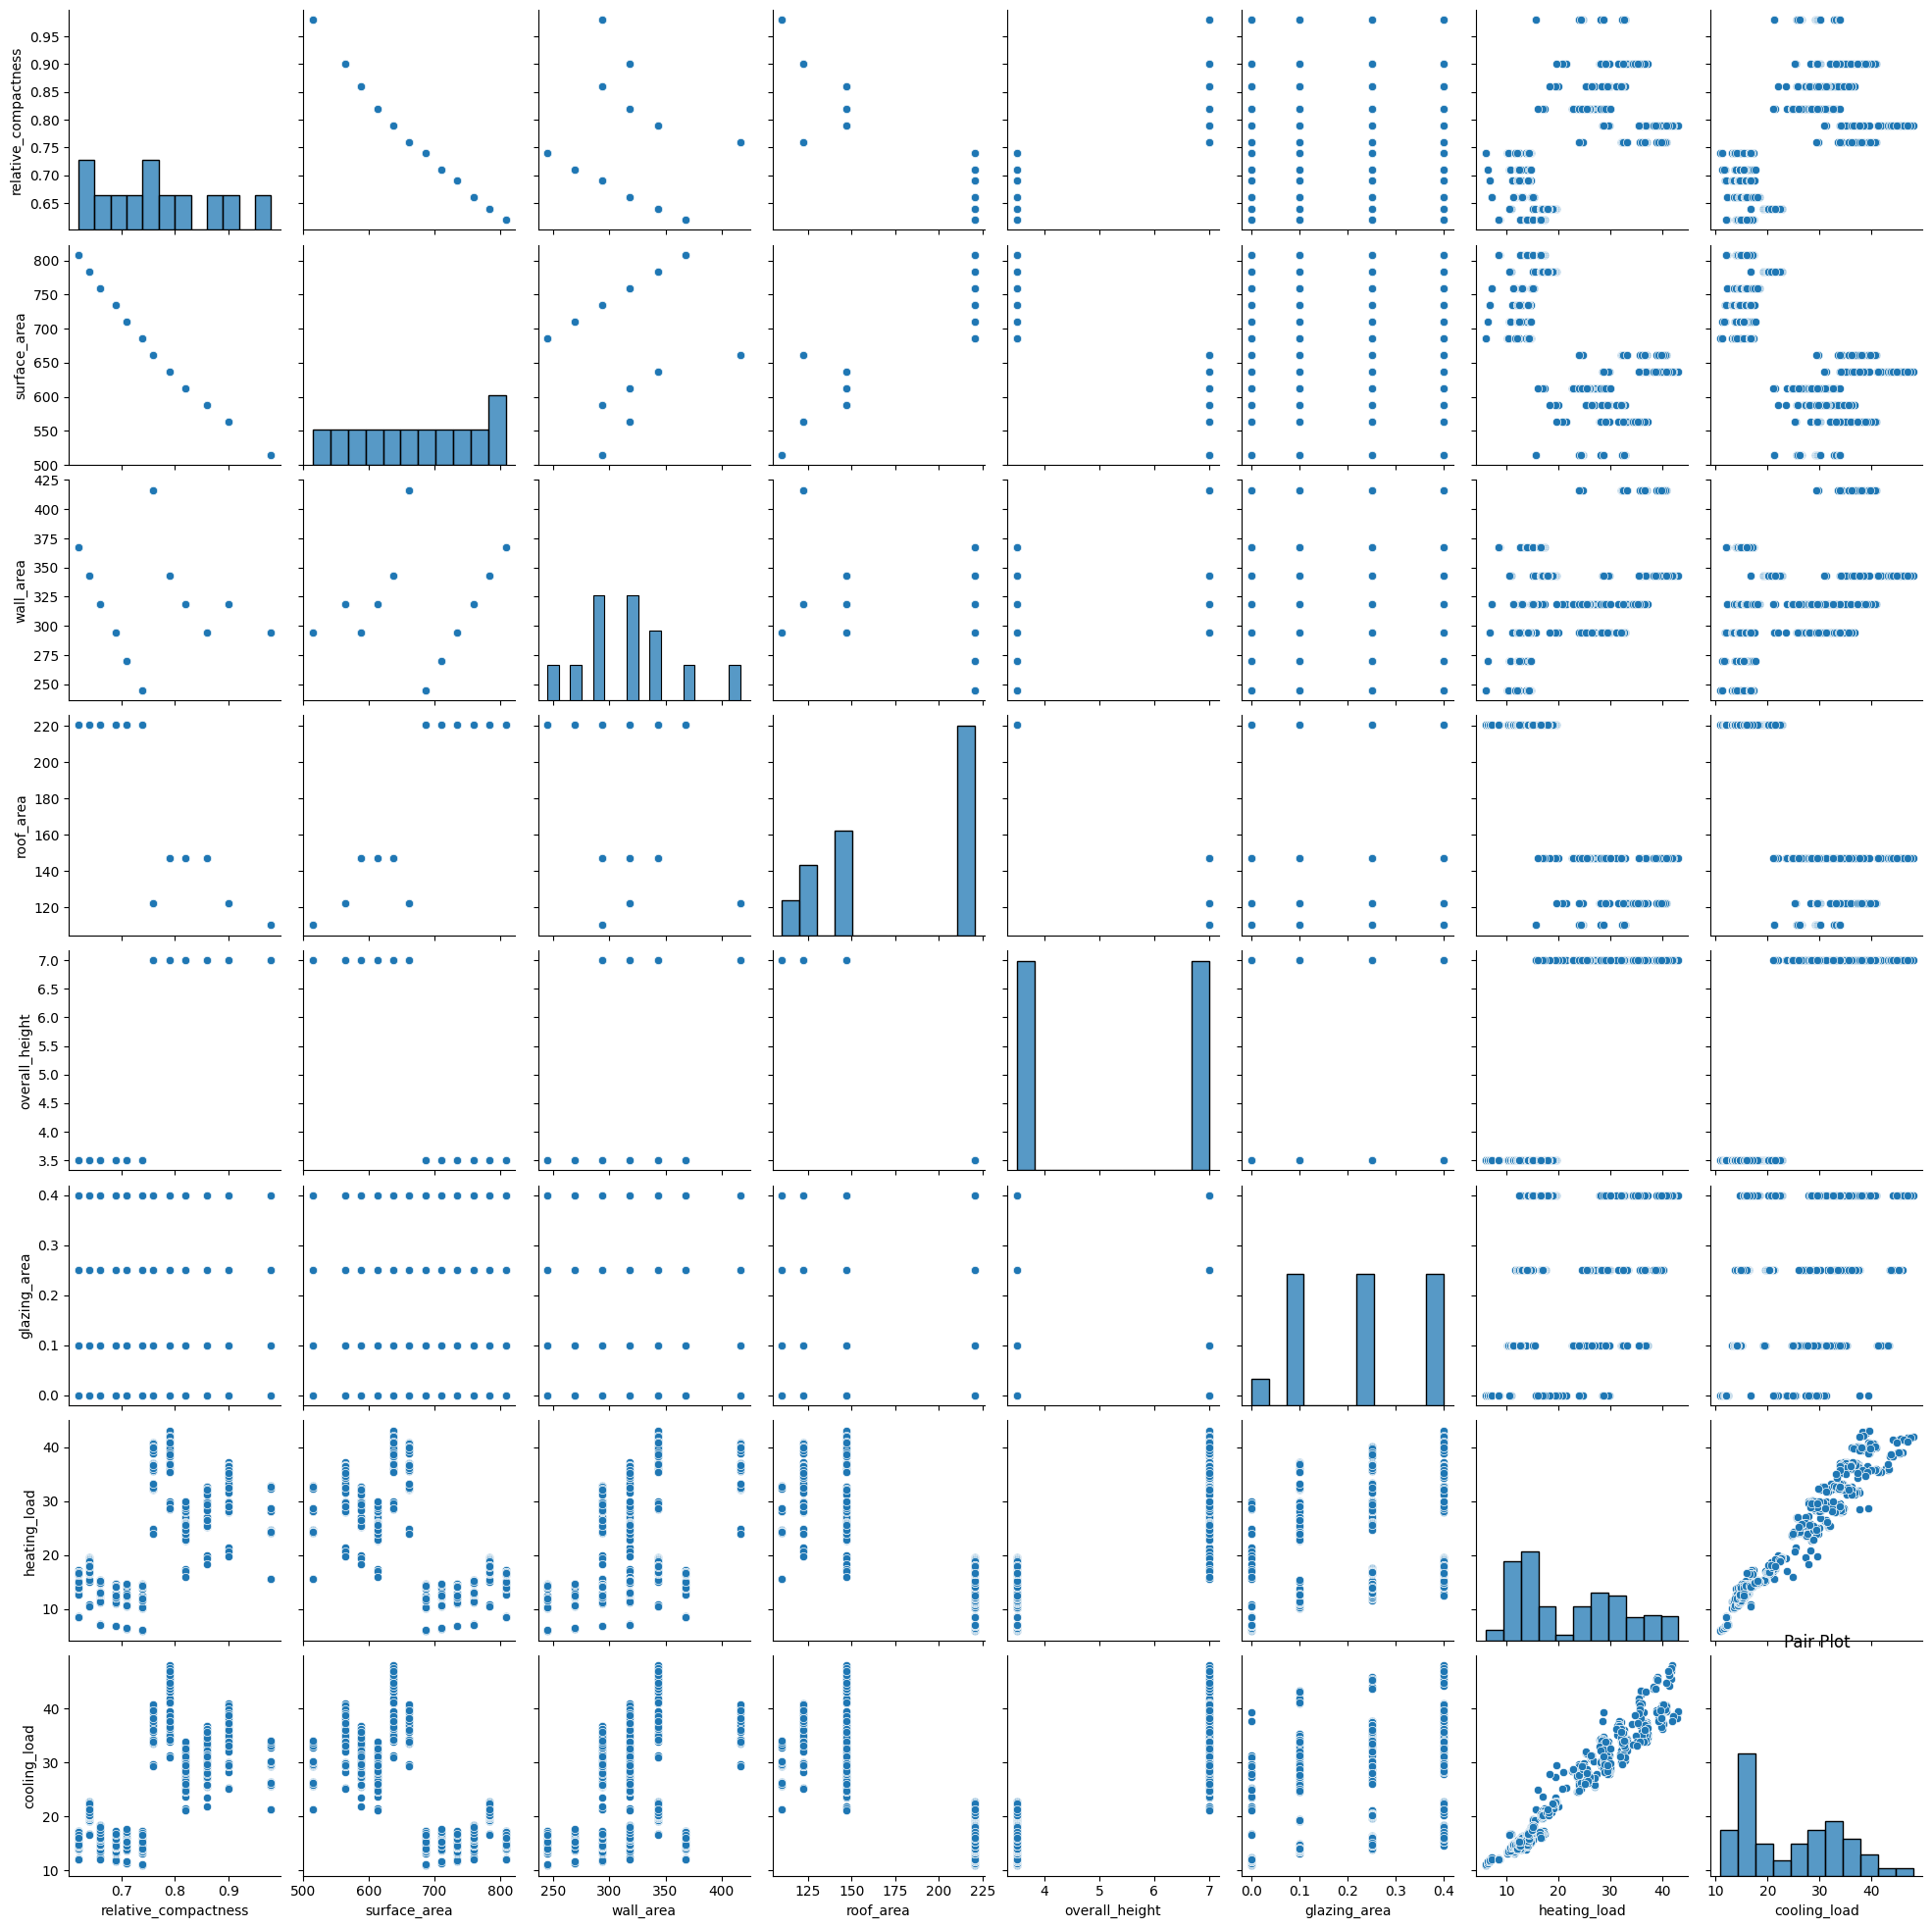

In [ ]:
#kiểm tra sự phân bố và mối quan hệ giữa các thuộc tính
sns.pairplot(df_new)
plt.title('Pair Plot')
plt.show()

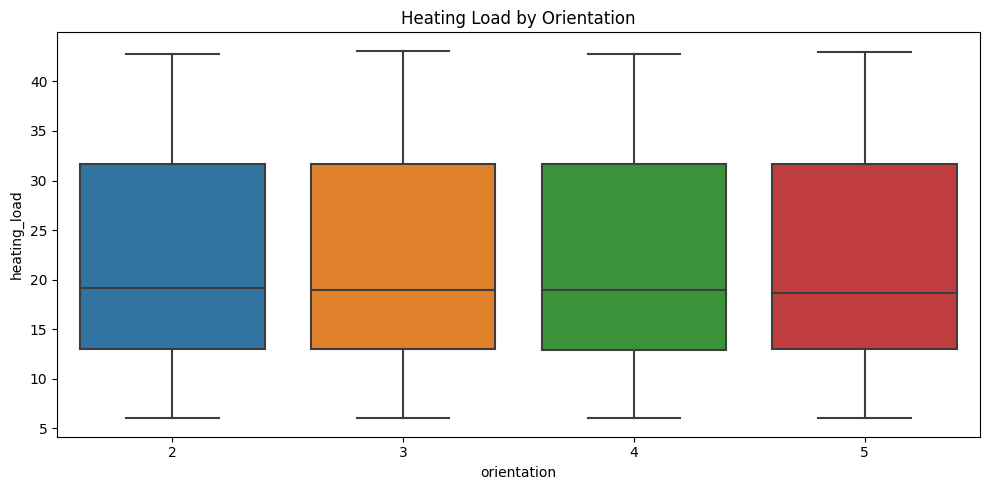

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))

# kiểm tra orientation có ảnh hưởng đến heating_load
sns.boxplot(data=df_new, x='orientation', y='heating_load')
plt.title('Heating Load by Orientation')
plt.tight_layout()
plt.show()

In [ ]:
# xóa thuộc tính orientation để giảm chiều dữ liệu
df_new = df_new.drop('orientation', axis=1)

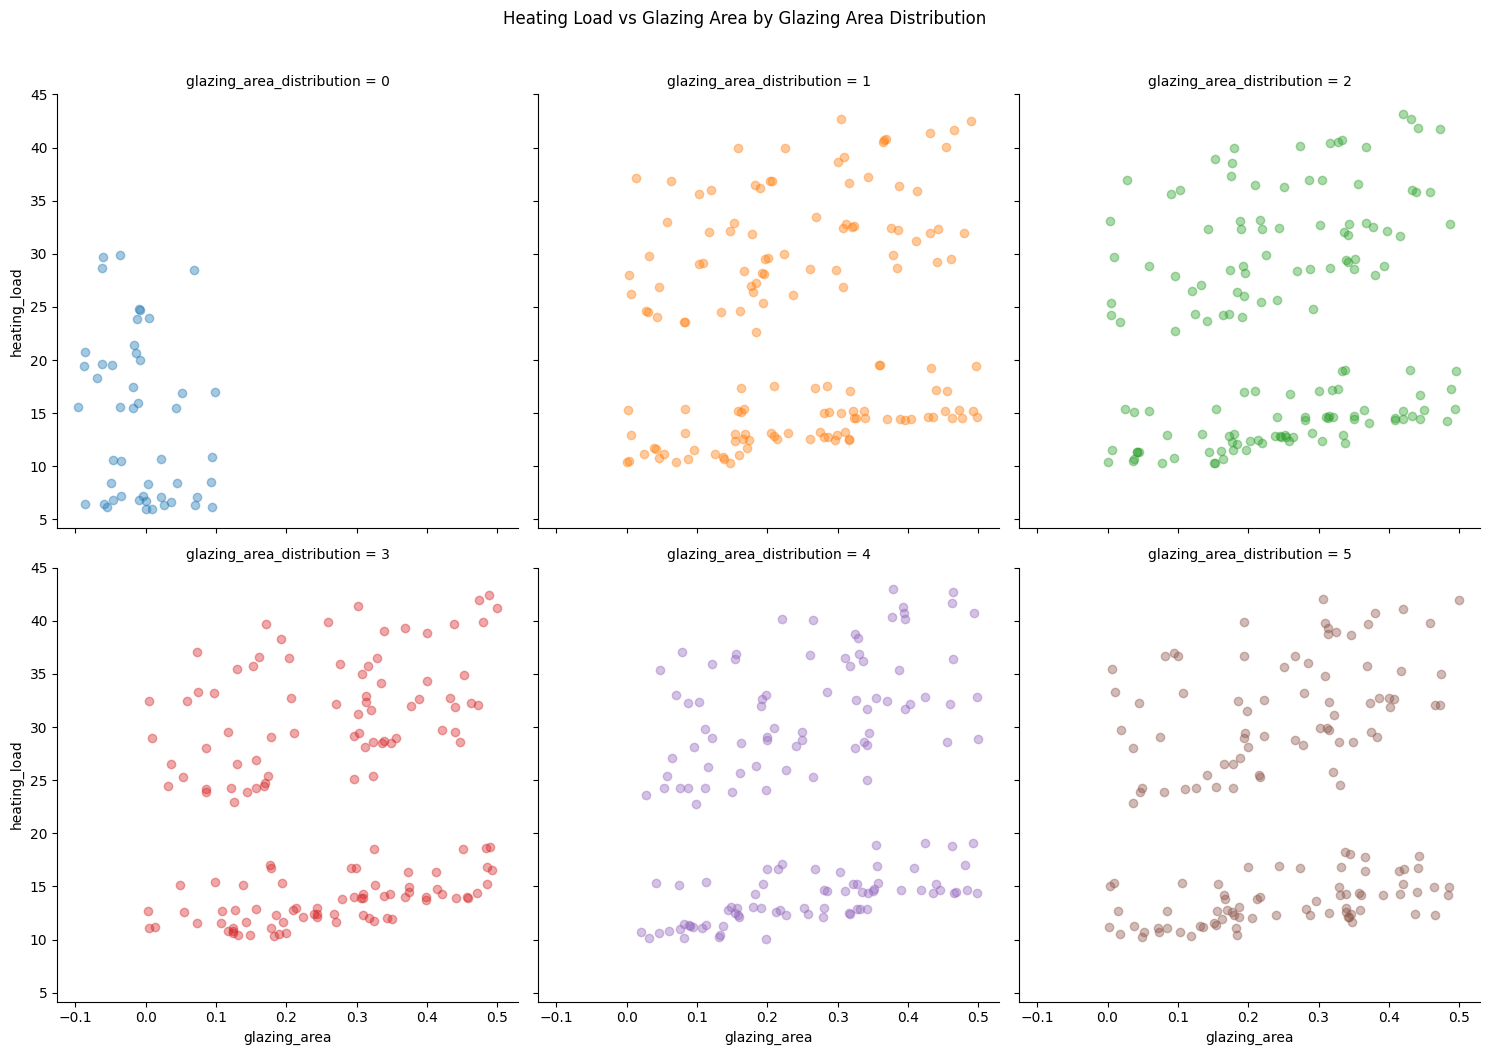

In [ ]:
# kiểm tra biến glazing_area có ảnh hưởng đến mối quan hệ giữa heating_load và glazing_area_distribution
lmplot = sns.lmplot(data=df_new, x='glazing_area', y='heating_load', hue='glazing_area_distribution',
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Heating Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

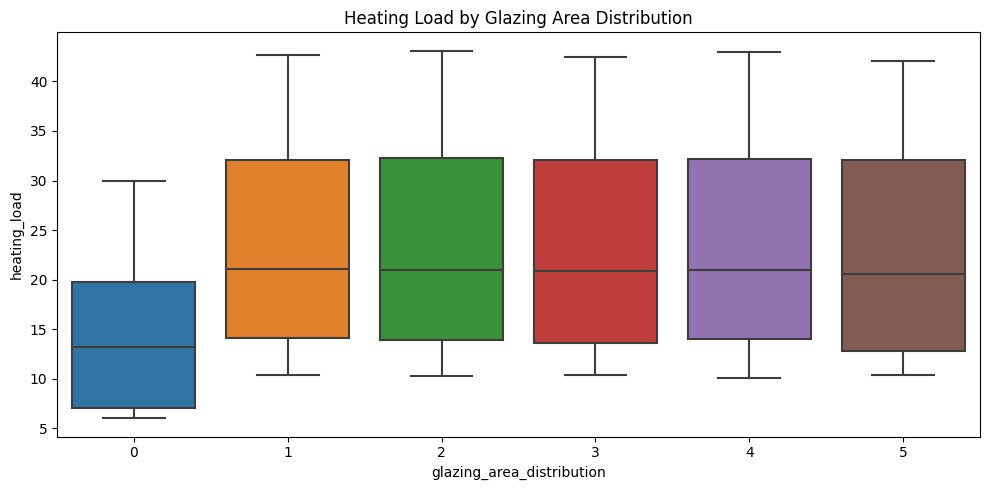

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))

# kiểm tra thuộc tính glazing_area_distribution có ảnh hưởng đến heating_load
sns.boxplot(data=df_new, x='glazing_area_distribution', y='heating_load')
plt.title('Heating Load by Glazing Area Distribution')
plt.tight_layout()
plt.show()

In [ ]:
# thay đổi glazing_area_distribution thành nhị phân để giảm chiều dữ liệu
df_new['glazing_area_distribution'] = df_new['glazing_area_distribution'].replace({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})
df_new['glazing_area_distribution'] = df_new['glazing_area_distribution'].astype('category')
df_new['glazing_area_distribution'].value_counts()

1    720
0     48
Name: glazing_area_distribution, dtype: int64

# **Model**

In [ ]:
X = df_new.drop(columns=['heating_load'], axis=1)
y = df_new['heating_load']

In [ ]:
X.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution,cooling_load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,28.28


In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('relative_compactness')
numerical_cols
# Preprocessing for numerical and categorical data
#numerical_transformer = StandardScaler()

# Apply preprocessing to the data
#X_preprocessed = numerical_transformer.fit_transform(X)
#df_new.head()

['surface_area',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'cooling_load']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
elements_to_remove = ['overall_height',
 'glazing_area',
 'cooling_load','relative_compactness']

for element in elements_to_remove:
    if element in numerical_cols:
        numerical_cols.remove(element)

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()

# Apply preprocessing to the data using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ],
    remainder='passthrough'
)

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
pd.DataFrame(X_preprocessed)

,0,1,2,3,4,5,6,7
0,-1.785875,-0.561951,-1.470077,0.98,7.0,0.0,0.0,21.33
1,-1.785875,-0.561951,-1.470077,0.98,7.0,0.0,0.0,21.33
2,-1.785875,-0.561951,-1.470077,0.98,7.0,0.0,0.0,21.33
3,-1.785875,-0.561951,-1.470077,0.98,7.0,0.0,0.0,21.33
4,-1.229239,0.000000,-1.198678,0.90,7.0,0.0,0.0,28.28
...,...,...,...,...,...,...,...,...
763,1.275625,0.561951,0.972512,0.64,3.5,0.4,1.0,21.40
764,1.553943,1.123903,0.972512,0.62,3.5,0.4,1.0,16.88
765,1.553943,1.123903,0.972512,0.62,3.5,0.4,1.0,17.11
766,1.553943,1.123903,0.972512,0.62,3.5,0.4,1.0,16.61


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.4152207676767676


In [ ]:
#Find the best max-depth for KNN algorithm
# Define a range of max_depth values to iterate over
max_neighbors_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_neighbors = None
best_score = 0.0

# Iterate over different max_depth values
for max_neighbors in max_neighbors_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = KNeighborsRegressor(n_neighbors=max_neighbors)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)

    # Print the score for the current max_depth
    print(f"Max Neighbors = {max_neighbors}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_neighbors = max_neighbors

# Print the best max depth and corresponding score
print(f"Best Max Neighbors = {best_max_neighbors}: Best Test Score = {best_score}")

Max Neighbors = 3: Test Score = 0.9864224498174062
Max Neighbors = 4: Test Score = 0.9839501149418098
Max Neighbors = 5: Test Score = 0.9825118864626505
Max Neighbors = 6: Test Score = 0.9815033635733971
Max Neighbors = 7: Test Score = 0.9808432375890547
Max Neighbors = 8: Test Score = 0.9792458646194201
Max Neighbors = 9: Test Score = 0.9777915681522313
Max Neighbors = 10: Test Score = 0.976814427541557
Max Neighbors = 11: Test Score = 0.9751477323818568
Max Neighbors = 12: Test Score = 0.9742574372425141
Max Neighbors = 13: Test Score = 0.9734094276303651
Max Neighbors = 14: Test Score = 0.9726169172451027
Max Neighbors = 15: Test Score = 0.971479639454751
Max Neighbors = 16: Test Score = 0.9701106128683367
Max Neighbors = 17: Test Score = 0.9694237668970227
Max Neighbors = 18: Test Score = 0.9684405962796964
Max Neighbors = 19: Test Score = 0.9680034585582602
Best Max Neighbors = 3: Best Test Score = 0.9864224498174062


In [ ]:
regression_tree = DecisionTreeRegressor(max_depth=8)
regression_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred1 = regression_tree.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred1)

print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 1.1030342306064558


In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.942750862161203
Max Depth = 4: Test Score = 0.9600837046661583
Max Depth = 5: Test Score = 0.9777634902648713
Max Depth = 6: Test Score = 0.9843946823477943
Max Depth = 7: Test Score = 0.9872561775988736
Max Depth = 8: Test Score = 0.9921802326429822
Max Depth = 9: Test Score = 0.9916135291707109
Max Depth = 10: Test Score = 0.9914991890061785
Max Depth = 11: Test Score = 0.9892656038413886
Max Depth = 12: Test Score = 0.991372845828598
Max Depth = 13: Test Score = 0.9913552629996768
Max Depth = 14: Test Score = 0.9913605243544074
Max Depth = 15: Test Score = 0.9913746545048564
Max Depth = 16: Test Score = 0.9892461877780887
Max Depth = 17: Test Score = 0.9892433192854476
Max Depth = 18: Test Score = 0.9913603416125981
Max Depth = 19: Test Score = 0.9913603416125981
Best Max Depth = 8: Best Test Score = 0.9921802326429822


# **Test data**

In [ ]:
new_data = pd.read_excel("/content/sample_data/ENB2012_testdata.xlsx")
new_data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'glazing_area', 'glazing_area_distribution', 'cooling_load']
new_data_preprocessed = preprocessor.fit_transform(new_data)
new_predictions = knn_regressor.predict(new_data_preprocessed)

new_predictions_tree = regression_tree.predict(new_data_preprocessed)
print("Predictions for new test data _ knn:")
print(pd.DataFrame(new_predictions))
print("\nPredictions for new test data _ tree:")
print(pd.DataFrame(new_predictions_tree))

Predictions for new test data _ knn:
            0
0   15.550000
1   15.550000
2   15.550000
3   15.550000
4   21.630000
5   19.383333
6   19.383333
7   26.466667
8   21.420000
9   18.103333
10  17.660000
11  22.560000
12  18.856667
13  18.103333
14  18.103333
15  21.293333
16  36.120000
17  28.100000
18  28.100000
19  38.156667

Predictions for new test data _ tree:
         0
0   15.550
1   15.550
2   15.550
3   15.550
4   20.840
5   21.460
6   20.710
7   26.402
8   19.500
9   19.024
10  17.050
11  18.310
12  17.050
13  17.180
14  17.180
15  15.980
16  28.520
17  29.900
18  29.630
19  28.750


In [ ]:
df.head(20)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97
